<a href="https://colab.research.google.com/github/IANGECHUKI176/deeplearning/blob/main/pytorch/gans/WGAN_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets , transforms
from torch.utils.data import DataLoader
import math
import numpy as np
from torchsummary import summary
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
n_epochs = 200
batch_size = 64
lr = 0.00005
latent_dim  = 100
b1 = 0.5
b2 = 0.999
img_size = 28
channels = 1
n_critic = 5           #number of training steps for discriminator per iter
clip_value = 0.01      #lower and upper clip value for disc. weights
display_step = 5000
image_shape = (channels,img_size,img_size)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()

        def block(in_feats,out_feats,normalize = True):
            layers = [nn.Linear(in_feats,out_feats)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feats,0.8))
            layers.append(nn.LeakyReLU(0.2,inplace = True))
            return layers
        self.model = nn.Sequential(
            *block(latent_dim,128,normalize = False),
            *block(128,256),
            *block(256,512),
            *block(512,1024),
            nn.Linear(1024,int(np.prod(image_shape))),
            nn.Tanh()
        )
    def forward(self,z):
        img = self.model(z)
        img = img.view(img.size(0),*image_shape)
        return img

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(image_shape)),512),
            nn.LeakyReLU(0.2,inplace = True),
            nn.Linear(512,256),
            nn.LeakyReLU(0.2,inplace = True),
            nn.Linear(256,1)
        )
    def forward(self,img):
        img_flat = img.view(img.size(0),-1)
        validity = self.model(img_flat)
        return validity

In [ ]:
# Loss weight for gradient penalty
lambda_gp = 10
generator = Generator().to(device)
discriminator = Discriminator().to(device)


dataloader

In [ ]:
dataloader = DataLoader(
    datasets.MNIST(
        './root',
        download = True,
        train  = True,
        transform = transforms.Compose([
            transforms.Resize(img_size),
            transforms.ToTensor(),
            transforms.Normalize([0.5],[0.5])
        ])
    ),
    batch_size = batch_size,
    shuffle = True
)
optimizer_G = torch.optim.Adam(generator.parameters(),lr = lr,betas= (b1,b2))
optimizer_D = torch.optim.Adam(discriminator.parameters() , betas = (b1,b2))

In [ ]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()



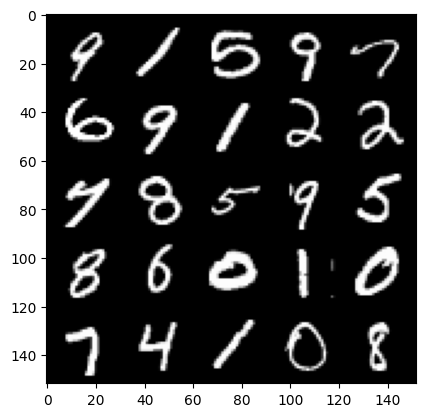

In [ ]:
images,labels = next(iter(dataloader))
show_tensor_images(images)

In [ ]:
def compute_gradient_penalty(D,real_samples,fake_samples):
    """Calculates the gradient penalty loss for WGAN GP"""
    device = real_samples.device
    batch_size = real_samples.size(0)
     # Random weight term for interpolation between real and fake samples
    alpha = torch.rand(batch_size,1,1,1,device = device)

    # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)

    # Compute D(interpolates) and its gradients w.r.t. interpolates
    d_interpolates = D(interpolates)

    gradients = torch.autograd.grad(
        outputs = d_interpolates,
        inputs = interpolates,
        grad_outputs = torch.ones_like(d_interpolates,device = device),
        create_graph = True,
        retain_graph = True,
        only_inputs= True
    )[0]

    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

In [ ]:
from tqdm import tqdm

 33%|███▎      | 308/938 [00:07<00:13, 45.70it/s]

Epoch 5, step 5000: Generator loss: -0.8967478012979035, discriminator loss: -12.133472232007968
----------------fake images-------------


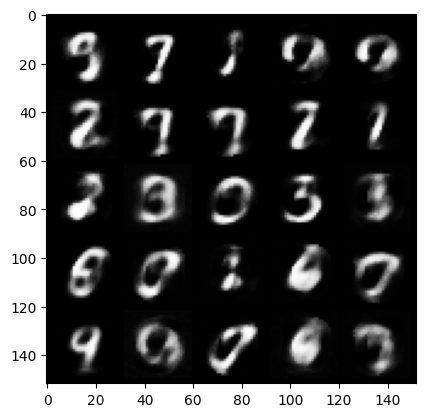

----------------real images-------------


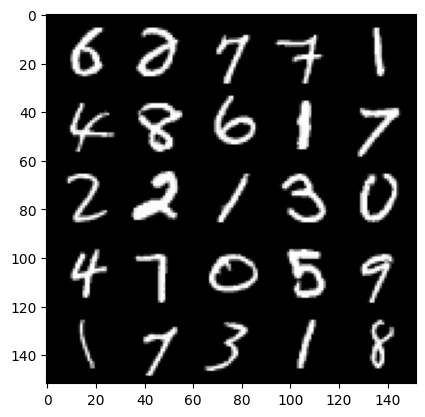

 66%|██████▌   | 617/938 [00:14<00:06, 46.49it/s]

Epoch 10, step 10000: Generator loss: -0.1483240636464209, discriminator loss: -7.1927681636810155
----------------fake images-------------


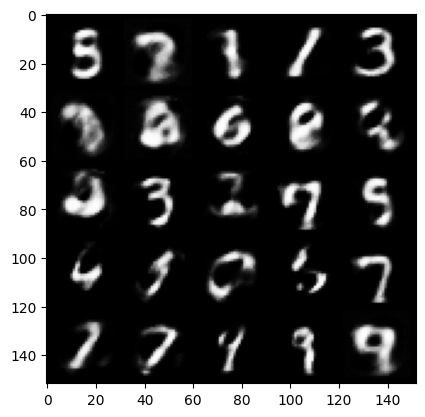

----------------real images-------------


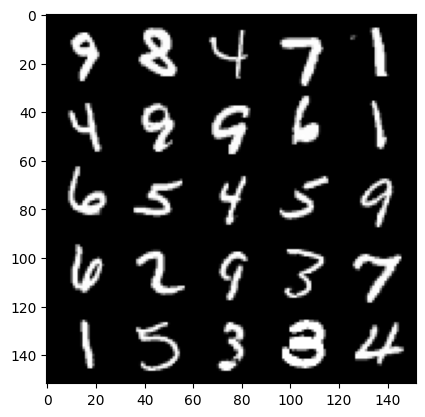

 99%|█████████▉| 930/938 [00:22<00:00, 45.20it/s]

Epoch 15, step 15000: Generator loss: -0.09287036390900615, discriminator loss: -5.852798074245435
----------------fake images-------------


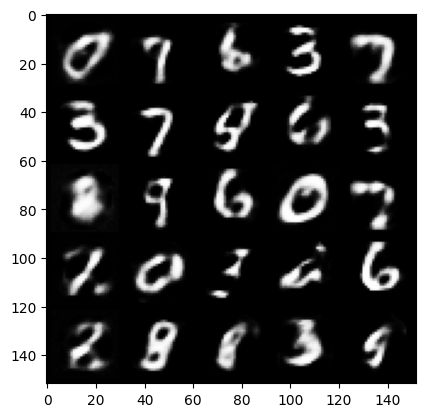

----------------real images-------------


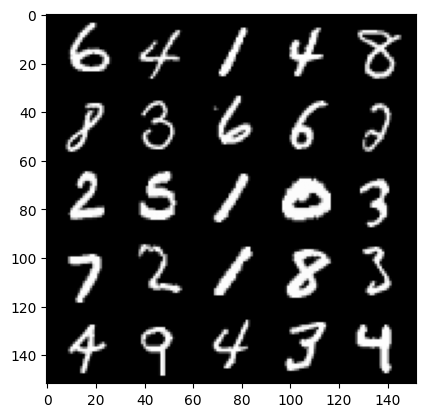

 32%|███▏      | 299/938 [00:06<00:13, 46.54it/s]

Epoch 21, step 20000: Generator loss: -0.11499893584027891, discriminator loss: -5.055412573432909
----------------fake images-------------


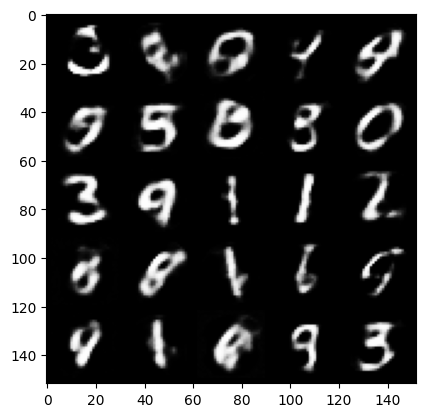

----------------real images-------------


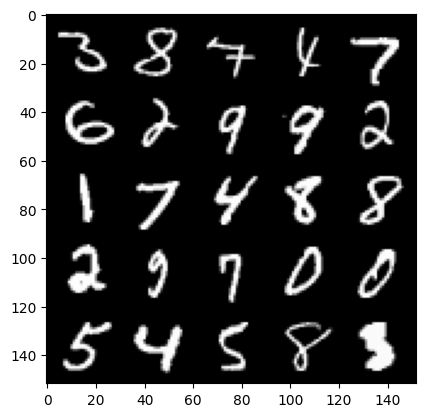

 65%|██████▌   | 612/938 [00:14<00:07, 45.34it/s]

Epoch 26, step 25000: Generator loss: -0.14582750141024592, discriminator loss: -4.559402888488764
----------------fake images-------------


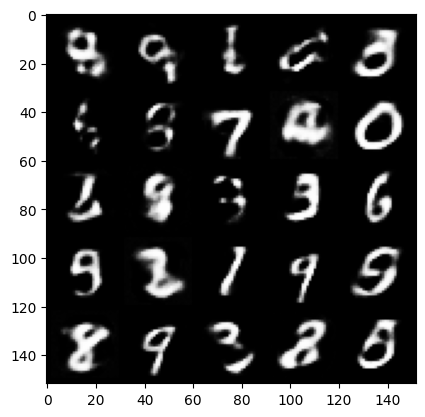

----------------real images-------------


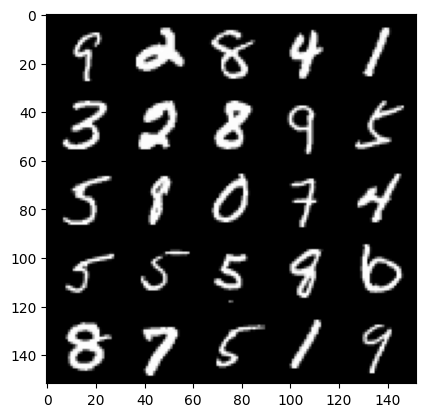

 98%|█████████▊| 918/938 [00:21<00:00, 44.89it/s]

Epoch 31, step 30000: Generator loss: -0.15419584170877917, discriminator loss: -4.187285707616806
----------------fake images-------------


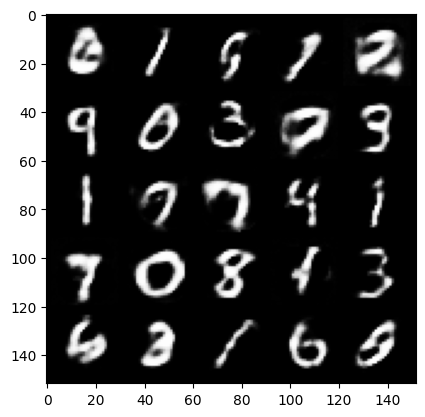

----------------real images-------------


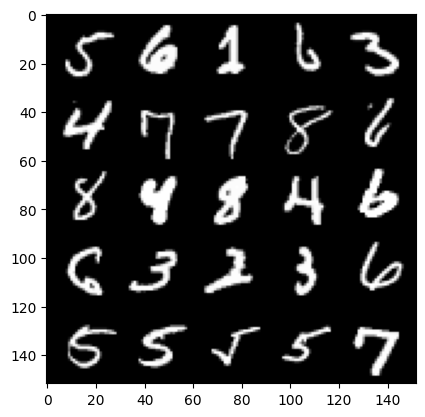

 31%|███▏      | 294/938 [00:07<00:14, 44.37it/s]

Epoch 37, step 35000: Generator loss: -0.1892637453321367, discriminator loss: -3.852829028892523
----------------fake images-------------


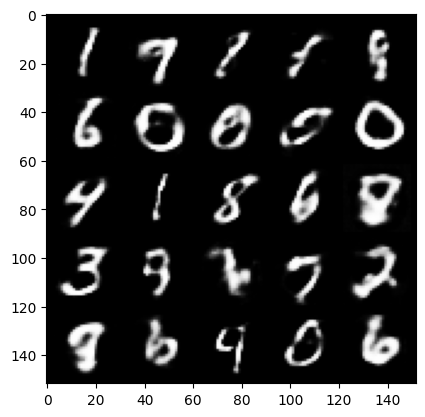

----------------real images-------------


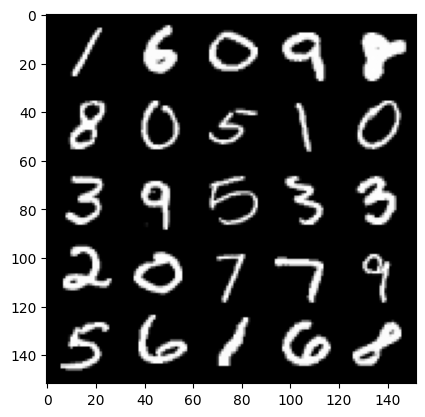

 64%|██████▍   | 601/938 [00:14<00:07, 44.10it/s]

Epoch 42, step 40000: Generator loss: -0.2321820068329573, discriminator loss: -3.5625678555965288
----------------fake images-------------


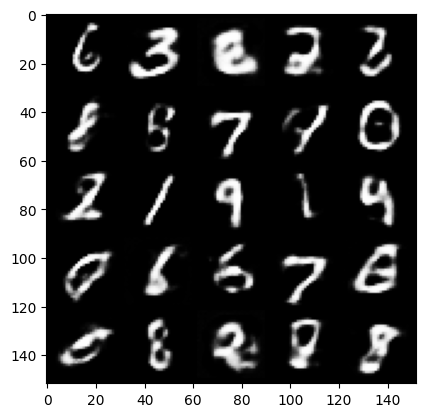

----------------real images-------------


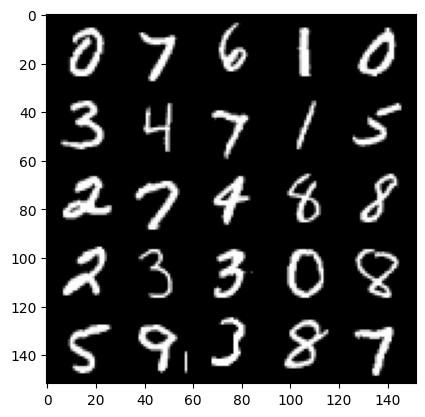

 97%|█████████▋| 911/938 [00:22<00:00, 43.42it/s]

Epoch 47, step 45000: Generator loss: -0.26203136327266713, discriminator loss: -3.331421631431577
----------------fake images-------------


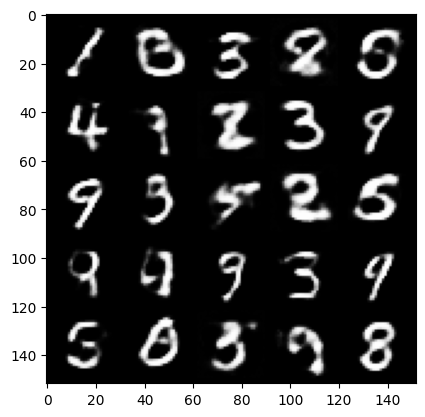

----------------real images-------------


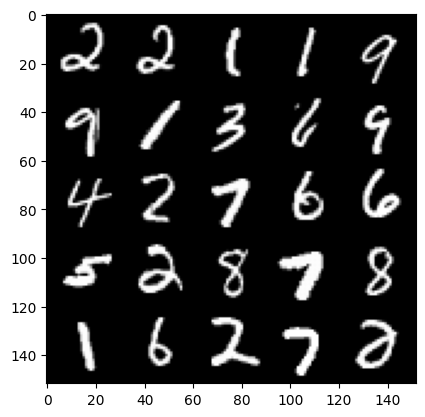

 30%|███       | 282/938 [00:07<00:15, 42.82it/s]

Epoch 53, step 50000: Generator loss: -0.29606813505291946, discriminator loss: -3.133293164634706
----------------fake images-------------


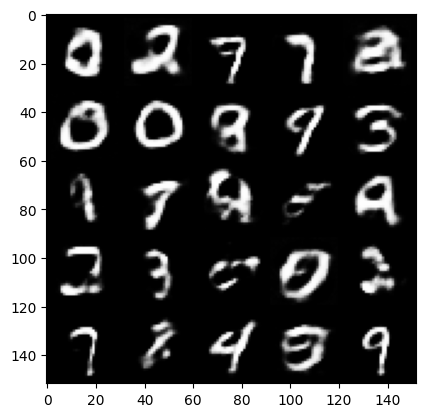

----------------real images-------------


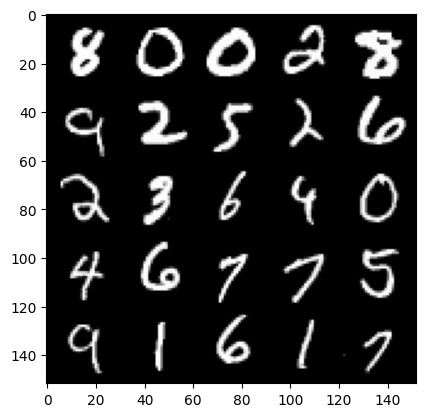

 63%|██████▎   | 595/938 [00:14<00:09, 35.42it/s]

Epoch 58, step 55000: Generator loss: -0.32252114633321816, discriminator loss: -2.9686948119878775
----------------fake images-------------


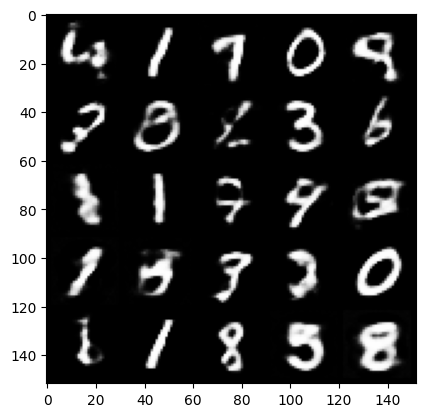

----------------real images-------------


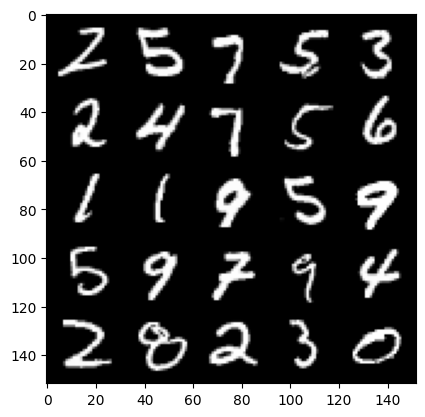

 97%|█████████▋| 906/938 [00:22<00:00, 42.80it/s]

Epoch 63, step 60000: Generator loss: -0.3190342480033635, discriminator loss: -2.8371085867166483
----------------fake images-------------


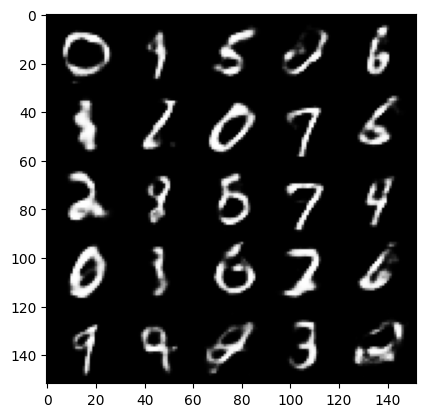

----------------real images-------------


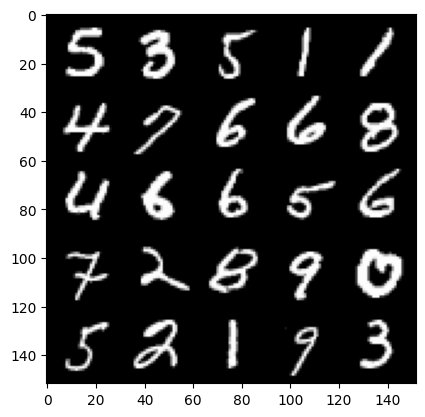

 29%|██▉       | 276/938 [00:07<00:15, 43.27it/s]

Epoch 69, step 65000: Generator loss: -0.30958228150010114, discriminator loss: -2.7268087640285543
----------------fake images-------------


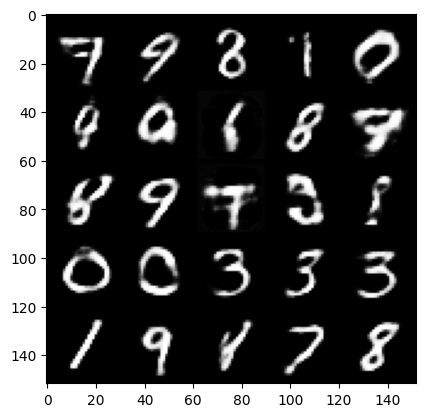

----------------real images-------------


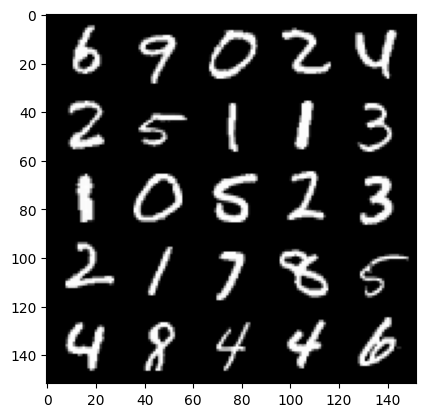

 63%|██████▎   | 588/938 [00:14<00:08, 40.69it/s]

Epoch 74, step 70000: Generator loss: -0.2947055979371067, discriminator loss: -2.6319869342327067
----------------fake images-------------


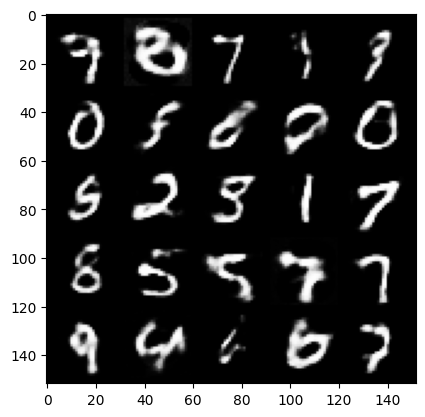

----------------real images-------------


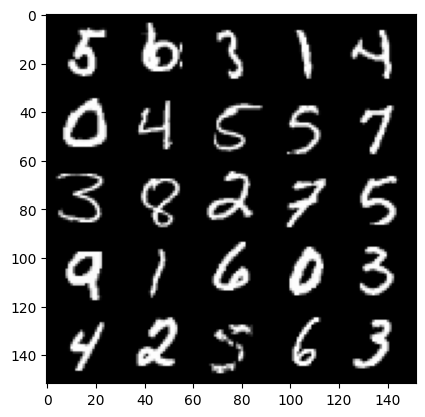

 96%|█████████▌| 897/938 [00:22<00:01, 32.75it/s]

Epoch 79, step 75000: Generator loss: -0.29146006881296593, discriminator loss: -2.5427672598361926
----------------fake images-------------


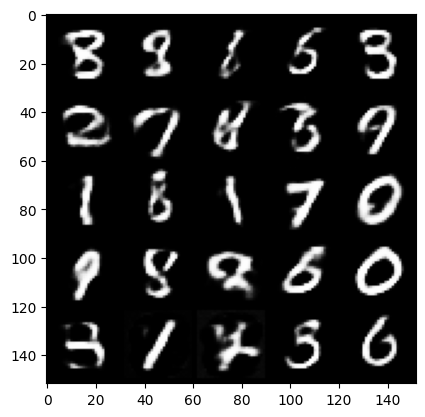

----------------real images-------------


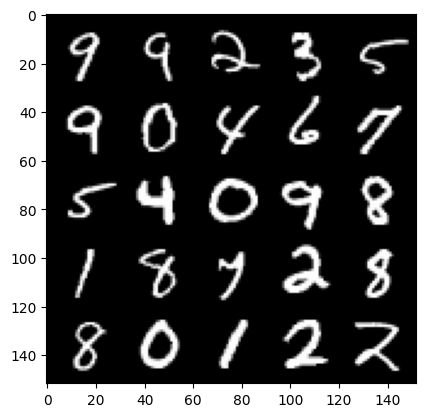

 29%|██▊       | 269/938 [00:06<00:16, 41.23it/s]

Epoch 85, step 80000: Generator loss: -0.29545969432443364, discriminator loss: -2.4695463724374735
----------------fake images-------------


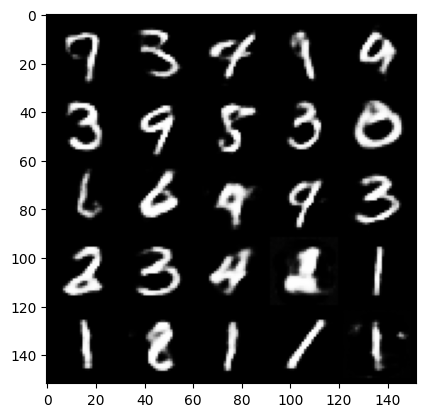

----------------real images-------------


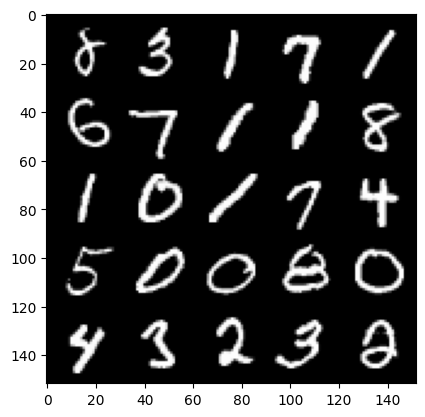

 61%|██████▏   | 576/938 [00:14<00:08, 40.96it/s]

Epoch 90, step 85000: Generator loss: -0.2868953073859218, discriminator loss: -2.3915023711919754
----------------fake images-------------


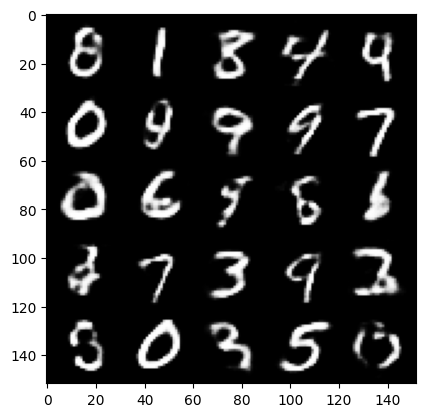

----------------real images-------------


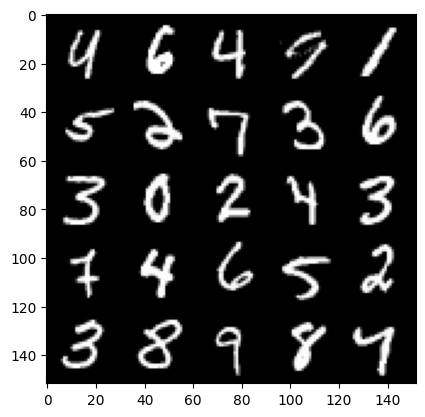

 95%|█████████▍| 887/938 [00:22<00:01, 41.47it/s]

Epoch 95, step 90000: Generator loss: -0.2856704115241763, discriminator loss: -2.329627214288709
----------------fake images-------------


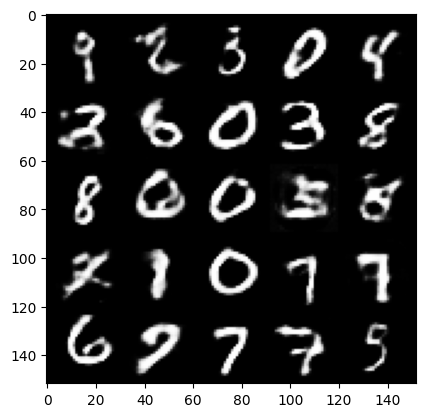

----------------real images-------------


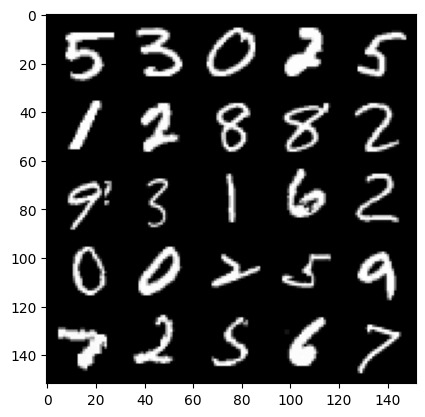

 28%|██▊       | 260/938 [00:06<00:16, 41.20it/s]

Epoch 101, step 95000: Generator loss: -0.2841108783483507, discriminator loss: -2.2639996299266807
----------------fake images-------------


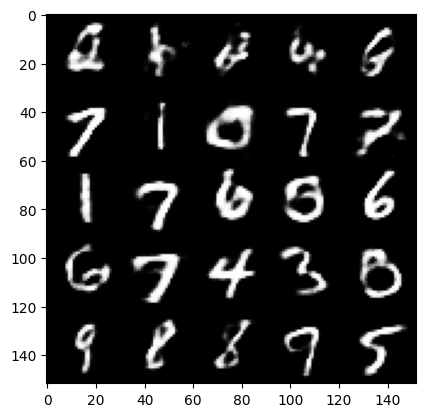

----------------real images-------------


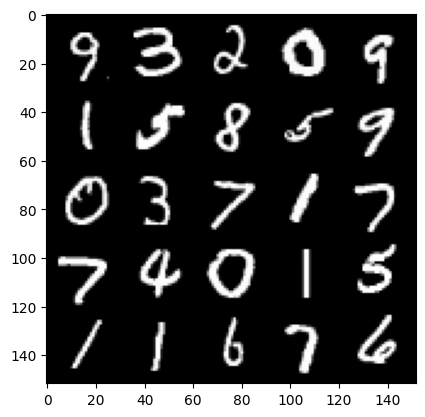

 61%|██████    | 570/938 [00:14<00:08, 41.34it/s]

Epoch 106, step 100000: Generator loss: -0.28058667035847923, discriminator loss: -2.1960200721263825
----------------fake images-------------


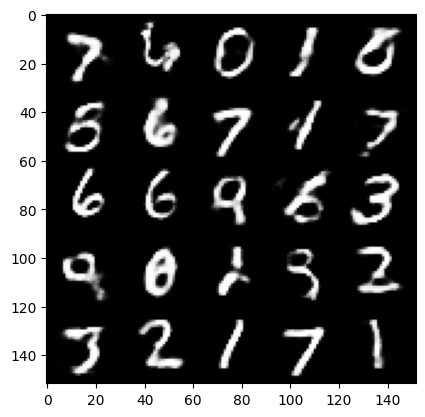

----------------real images-------------


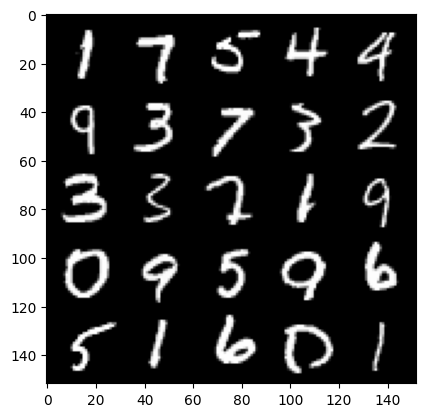

 94%|█████████▍| 881/938 [00:22<00:01, 32.65it/s]

Epoch 111, step 105000: Generator loss: -0.2808592456683516, discriminator loss: -2.137388223183154
----------------fake images-------------


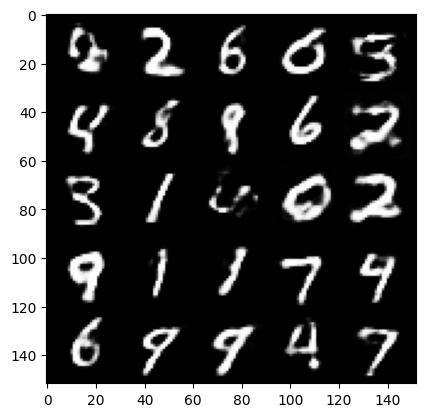

----------------real images-------------


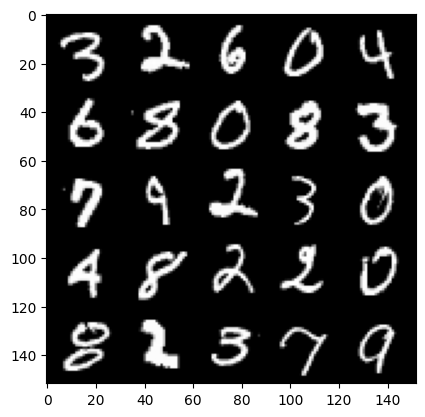

 27%|██▋       | 253/938 [00:06<00:16, 41.73it/s]

Epoch 117, step 110000: Generator loss: -0.28341232608035233, discriminator loss: -2.0804771263122572
----------------fake images-------------


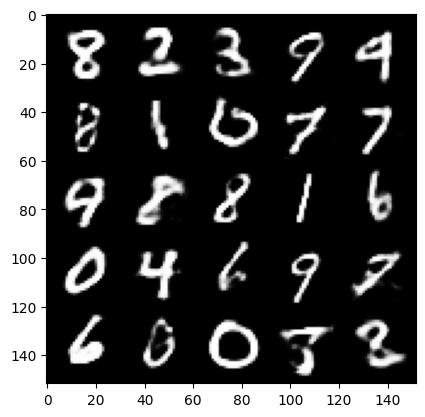

----------------real images-------------


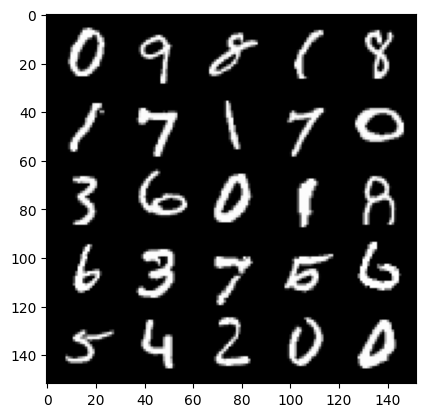

 60%|█████▉    | 561/938 [00:14<00:09, 41.66it/s]

Epoch 122, step 115000: Generator loss: -0.28044474816620346, discriminator loss: -2.0318824992060702
----------------fake images-------------


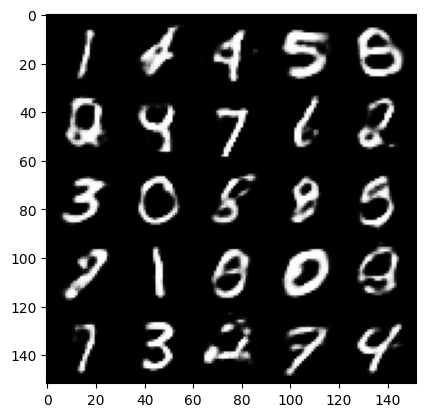

----------------real images-------------


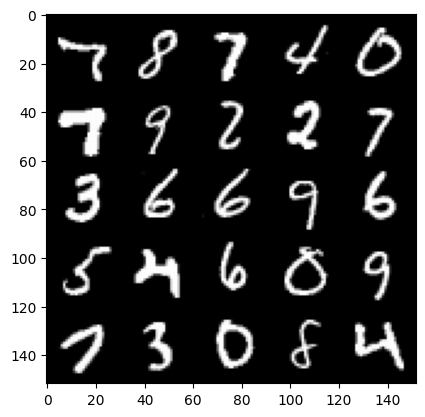

 93%|█████████▎| 873/938 [00:23<00:01, 33.47it/s]

Epoch 127, step 120000: Generator loss: -0.27657681004926576, discriminator loss: -1.975030405235289
----------------fake images-------------


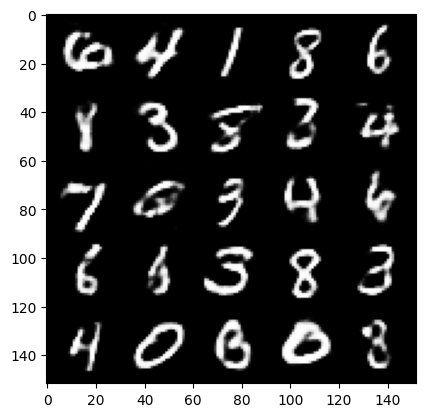

----------------real images-------------


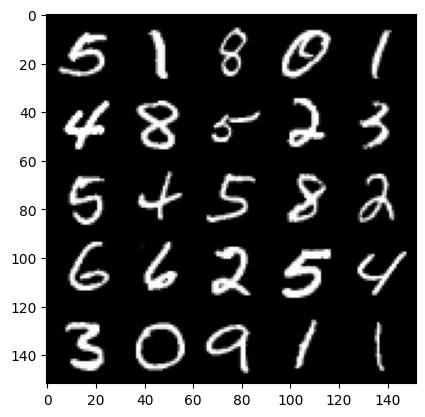

 26%|██▌       | 246/938 [00:06<00:24, 27.81it/s]

Epoch 133, step 125000: Generator loss: -0.2762261628843842, discriminator loss: -1.926886066889764
----------------fake images-------------


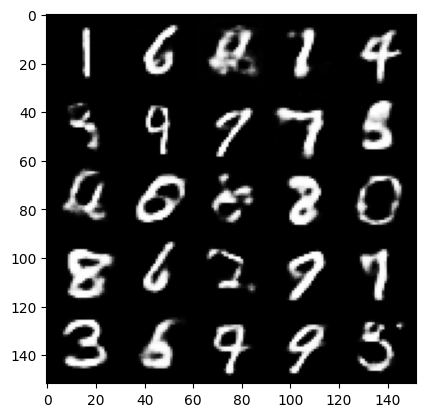

----------------real images-------------


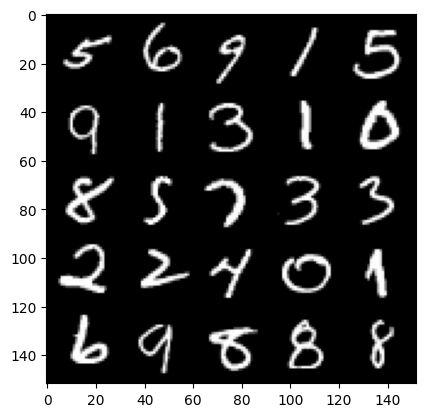

 59%|█████▉    | 552/938 [00:14<00:09, 42.74it/s]

Epoch 138, step 130000: Generator loss: -0.2797589180380109, discriminator loss: -1.8809765850901634
----------------fake images-------------


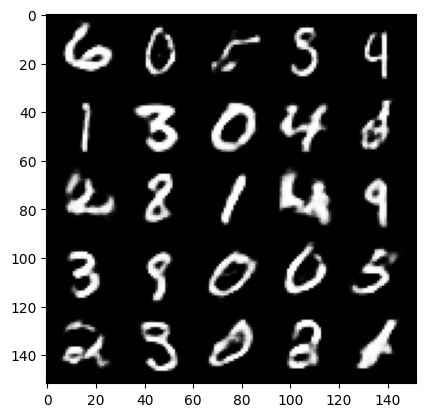

----------------real images-------------


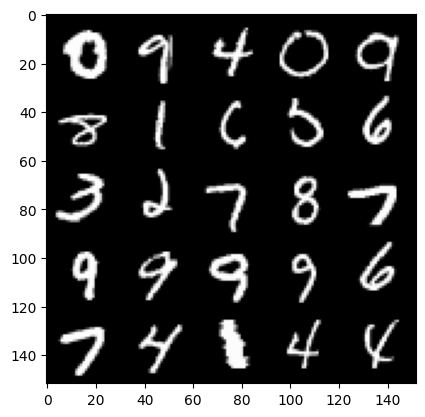

 92%|█████████▏| 862/938 [00:22<00:01, 38.23it/s]

Epoch 143, step 135000: Generator loss: -0.2740249169491229, discriminator loss: -1.8361359141469018
----------------fake images-------------


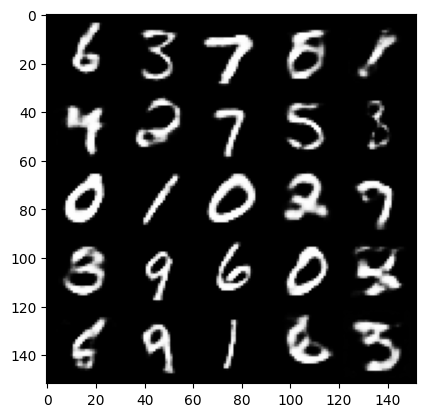

----------------real images-------------


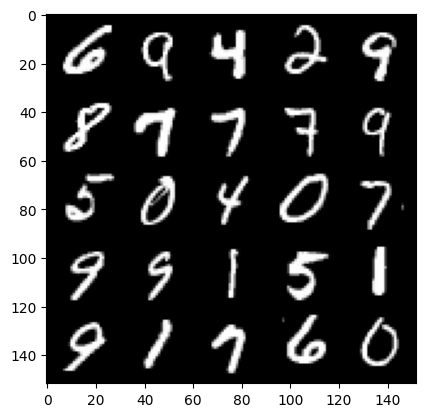

 25%|██▌       | 238/938 [00:05<00:17, 40.52it/s]

Epoch 149, step 140000: Generator loss: -0.2652611732691525, discriminator loss: -1.7987122198462466
----------------fake images-------------


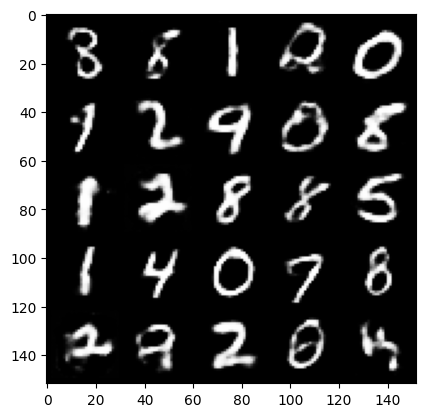

----------------real images-------------


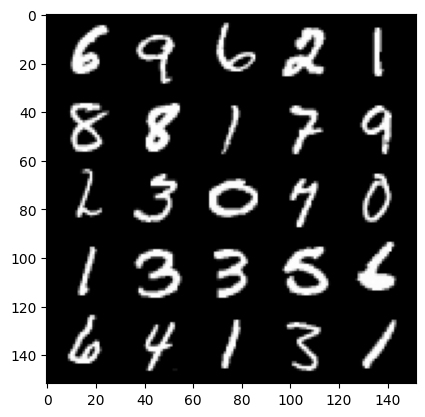

 58%|█████▊    | 546/938 [00:14<00:10, 36.54it/s]

Epoch 154, step 145000: Generator loss: -0.26284038496986023, discriminator loss: -1.7593522295355788
----------------fake images-------------


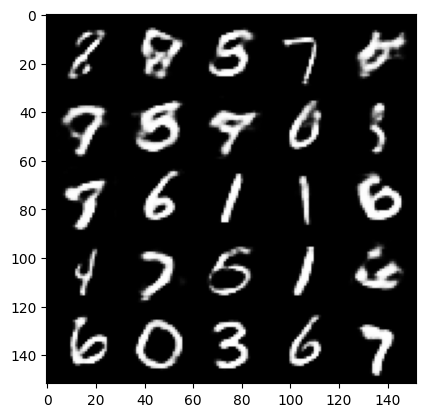

----------------real images-------------


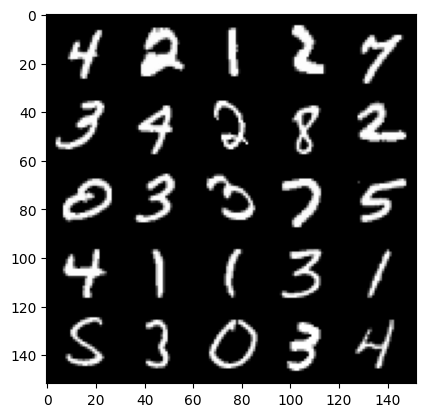

 91%|█████████▏| 857/938 [00:25<00:02, 34.24it/s]

Epoch 159, step 150000: Generator loss: -0.25897630801647914, discriminator loss: -1.7199809239506685
----------------fake images-------------


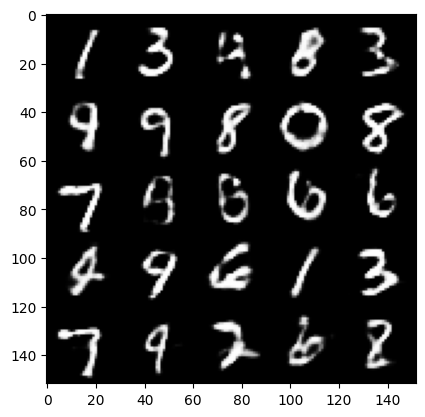

----------------real images-------------


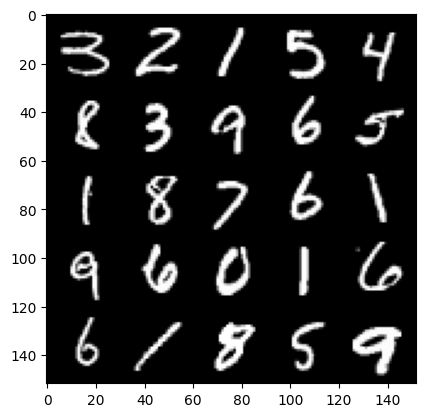

 24%|██▍       | 229/938 [00:06<00:19, 37.08it/s]

Epoch 165, step 155000: Generator loss: -0.24809245929494492, discriminator loss: -1.6937354325175291
----------------fake images-------------


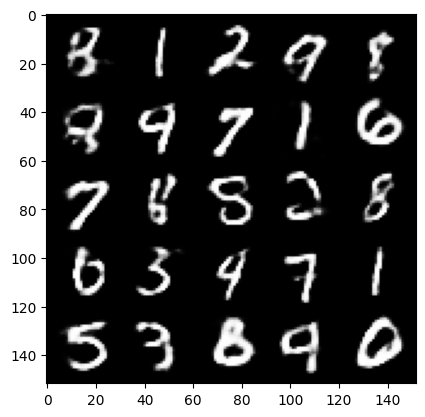

----------------real images-------------


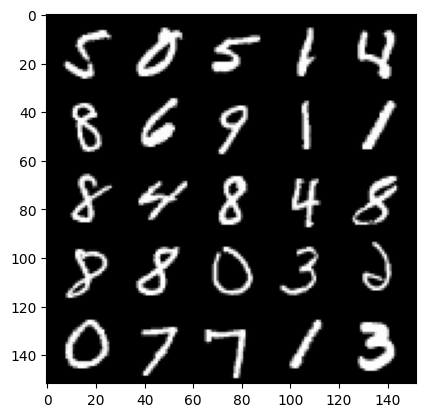

 57%|█████▋    | 539/938 [00:15<00:10, 37.07it/s]

Epoch 170, step 160000: Generator loss: -0.234959982570261, discriminator loss: -1.6597224006056785
----------------fake images-------------


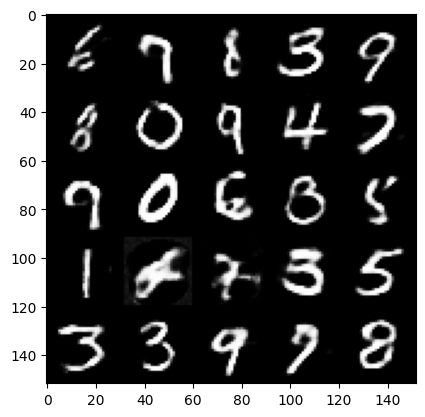

----------------real images-------------


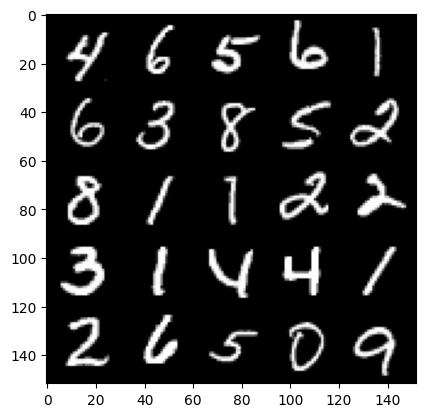

 90%|█████████ | 848/938 [00:24<00:02, 36.55it/s]

Epoch 175, step 165000: Generator loss: -0.2160696806333957, discriminator loss: -1.6216025243997656
----------------fake images-------------


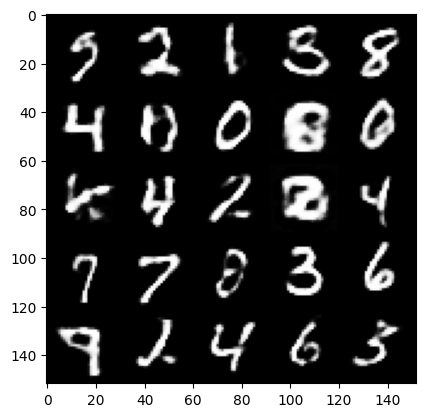

----------------real images-------------


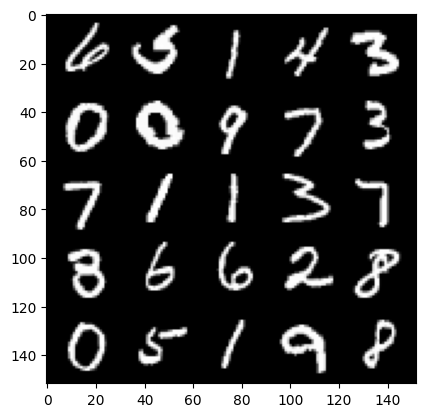

 23%|██▎       | 220/938 [00:06<00:18, 38.11it/s]

Epoch 181, step 170000: Generator loss: -0.2123140134982767, discriminator loss: -1.5908292967200341
----------------fake images-------------


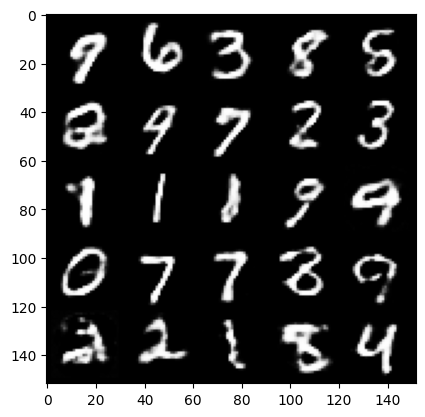

----------------real images-------------


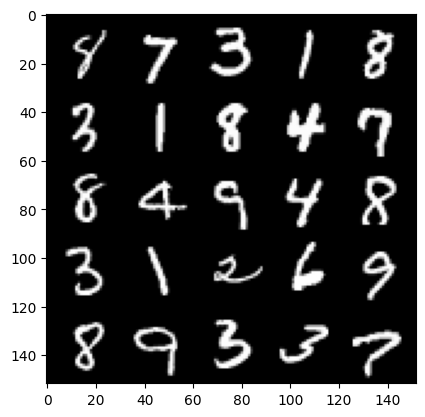

 56%|█████▋    | 529/938 [00:15<00:10, 38.06it/s]

Epoch 186, step 175000: Generator loss: -0.19639954481981717, discriminator loss: -1.559922963541746
----------------fake images-------------


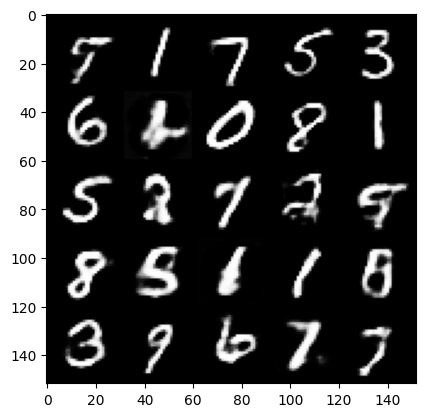

----------------real images-------------


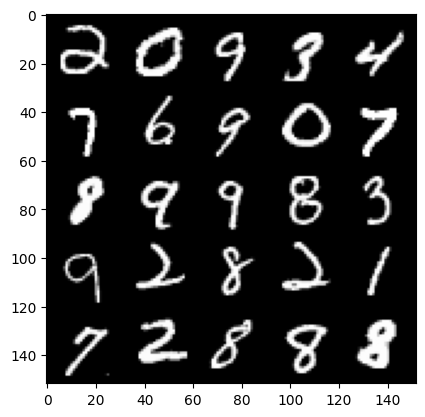

 89%|████████▉ | 839/938 [00:25<00:02, 37.68it/s]

Epoch 191, step 180000: Generator loss: -0.16086462431103007, discriminator loss: -1.5252781788110759
----------------fake images-------------


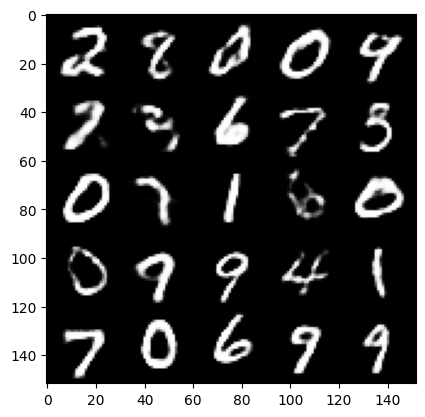

----------------real images-------------


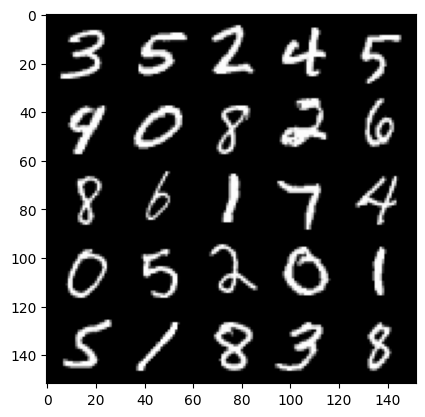

 23%|██▎       | 212/938 [00:06<00:19, 36.57it/s]

Epoch 197, step 185000: Generator loss: -0.12043745661042603, discriminator loss: -1.4951355269610886
----------------fake images-------------


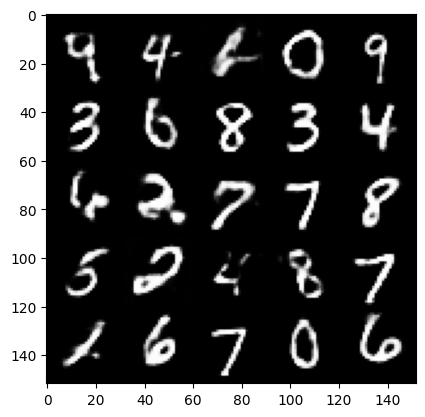

----------------real images-------------


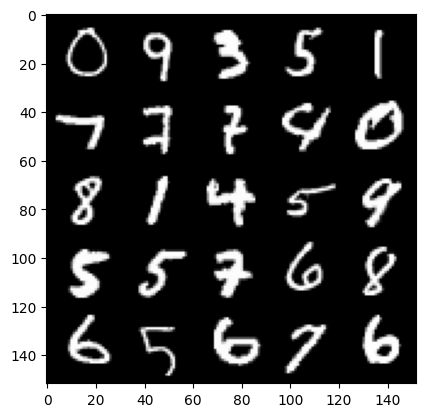

 82%|████████▏ | 773/938 [00:23<00:04, 38.36it/s]

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
    for i,(imgs,_) in enumerate(tqdm(dataloader)):
        real_imgs =  imgs.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = torch.normal(0,1,(real_imgs.size(0),latent_dim)).to(device)
        # Generate a batch of images
        fake_imgs = generator(z)

        #real images
        real_validity = discriminator(real_imgs)
        #fake images
        fake_validity = discriminator(fake_imgs)

        gradient_penalty = compute_gradient_penalty(discriminator,real_imgs.data,fake_imgs.data)

        #adversarial loss
        d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + lambda_gp * gradient_penalty

        d_loss.backward()
        optimizer_D.step()

        # Keep track of the average discriminator loss
        mean_discriminator_loss += d_loss.item() / display_step


        optimizer_G.zero_grad()
        # Train the generator every n_critic steps
        if i % n_critic == 0:
            # -----------------
            #  Train Generator
            # -----------------

            #generate a batch of images
            fake_imgs = generator(z)

            # Loss measures generator's ability to fool the discriminator
            # Train on fake images
            fake_validity = discriminator(fake_imgs)
            g_loss = -torch.mean(fake_validity)

            g_loss.backward()
            optimizer_G.step()


            # Keep track of the average generator loss
            mean_generator_loss += g_loss.item() / display_step

            ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            print('----------------fake images-------------')
            show_tensor_images(fake_imgs)
            print('----------------real images-------------')
            show_tensor_images(real_imgs)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1